Simple script to fetch all the latest measurement probe data in Africa, create seperate csv files per country, and cocatenate into a single csv file.

***This notebook, and csv files must be in the same directory***

***Delete all the csv files in the directory if you need to run this script again***

In [2]:
import requests
import json
from pandas.io.json import json_normalize 
import time
from datetime import date
import pandas as pd
import _thread
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib as mpl
from datetime import datetime
import numpy as np
import csv
import os
import glob


os.chdir('/home/tunde/RESEARCH_&_INNOVATION/RIPE_Atlas_Analysis/All_Countries/')

%matplotlib inline

#set ggplot style
plt.style.use('default')
plt.rcParams.update({'font.size': 14})

ATLAS_PROBES_URI = "https://stat.ripe.net/data/atlas-probes/data.json?resource="
ATLAS_DEPLOYMENT_URI = "https://stat.ripe.net/data/atlas-probe-deployment/data.json?resource="

ccs = [
'EG', 'BJ', 'CI', 'CV', 'GH', 'GM', 'GN', 'GW', 'AO', 'CF', 'CG', 'CM', 'GA', 'GQ', 'TD', 'BI', 'DJ', 'ER', 'ET', 'KM', 'BW', 'MA', 'SD', 'TN', 'LR', 'ML', 'MR', 'NE', 'NG', 'SL', 'SN', 'TG', 'ST', 'KE', 'MG', 'MU', 'MW', 'MZ', 'RE', 'RW', 'SC', 'SO', 'UG', 'LS', 'NA', 'SZ', 'ZA', 'DZ', 'EH', 'LY', 'BF', 'SH', 'CD', 'TZ', 'YT', 'ZM', 'ZW']

Function to get probe status per country and create a seperate csv file per country in the list ***ccs*** above

In [3]:
def getDeployment(cc):
    
    test_url = ATLAS_DEPLOYMENT_URI + cc
    
    df = pd.DataFrame()
    
    try:
        r = requests.get(test_url)
    except requests.exceptions.RequestException as e:
        return "Request FAILED"
    
    try:
        data = json.loads(r.text)['data']['deployments'][0]['deployment']
        df = json_normalize(data)
        df['cc'] = cc
    except KeyError as e:
        pass
    
    return df

Loop through all the created csv files in the present directory the notebook is

In [4]:
for cc in ccs:
        print(cc)
        a = getDeployment(cc)
        a.to_csv(cc +'__latest_deployments.csv')

EG
BJ
CI
CV
GH
GM
GN
GW
AO
CF
CG
CM
GA
GQ
TD
BI
DJ
ER
ET
KM
BW
MA
SD
TN
LR
ML
MR
NE
NG
SL
SN
TG
ST
KE
MG
MU
MW
MZ
RE
RW
SC
SO
UG
LS
NA
SZ
ZA
DZ
EH
LY
BF
SH
CD
TZ
YT
ZM
ZW


 Merge the csv files created above 

In [5]:
extension = 'csv'

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "2020_africa_probes_deployment.csv", index=False, encoding='utf-8-sig')

print('csv files successfully merged')

csv files successfully merged


Confirm that the csv files were successfully merged


In [6]:
df = pd.read_csv('/home/tunde/RESEARCH_&_INNOVATION/RIPE_Atlas_Analysis/All_Countries/2020_africa_probes_deployment.csv')
#df = df.iloc[:,[0,1,2,3,4,5,6]]
df.head(20)
df.shape


(109973, 7)

Rename the columns and confirm

In [7]:
df = pd.read_csv('/home/tunde/RESEARCH_&_INNOVATION/RIPE_Atlas_Analysis/latest_deployments.csv')
df.rename(columns = {'statuses.abandoned': 'abandoned', 'statuses.connected': 'connected', 'statuses.disconnected': 'disconnected', 'statuses.neverseen': 'neverseen'}, inplace = True)
df = df.iloc[:,[0,1,2,3,4,5,]]
df.head(20)

,Unnamed: 0,date,abandoned,connected,disconnected,neverseen
0,0,2020-09-21,18,3,1,0.0
1,1,2020-09-20,18,3,1,0.0
2,2,2020-09-19,18,3,1,0.0
3,3,2020-09-18,18,2,2,0.0
4,4,2020-09-17,18,2,2,0.0
5,5,2020-09-16,18,3,1,0.0
6,6,2020-09-15,18,3,1,0.0
7,7,2020-09-14,18,2,2,0.0
8,8,2020-09-13,18,3,1,0.0
9,9,2020-09-12,18,3,1,0.0


Group columns accordingly

In [23]:
df_agg = df.groupby(['date'])['neverseen', 'abandoned','connected','disconnected'].sum().reset_index()
#df_agg.set_index('date')
df_agg.tail(10)
#df_agg.shape

,date,neverseen,abandoned,connected,disconnected
2178,2020-09-12,0.0,18,3,1
2179,2020-09-13,0.0,18,3,1
2180,2020-09-14,0.0,18,2,2
2181,2020-09-15,0.0,18,3,1
2182,2020-09-16,0.0,18,3,1
2183,2020-09-17,0.0,18,2,2
2184,2020-09-18,0.0,18,2,2
2185,2020-09-19,0.0,18,3,1
2186,2020-09-20,0.0,18,3,1
2187,2020-09-21,0.0,18,3,1


We group the rows by date and sum the statuses before plotting

Let's split and re-merge the dataframes


In [33]:
df_neverseen = df_agg.iloc[:,[0,1]]
df_neverseen.columns = ['date','amount']
df_neverseen= df_neverseen.assign(type = 'neverseen')

df_abandoned = df_agg.iloc[:,[0,2]]
df_abandoned.columns = ['date','amount']
df_abandoned = df_abandoned.assign(type = 'abandoned')

df_connected = df_agg.iloc[:,[0,3]]
df_connected.columns = ['date','amount']
df_connected = df_connected.assign(type = 'connected')

df_disconnected = df_agg.iloc[:,[0,4]]
df_disconnected.columns = ['date','amount']
df_disconnected = df_disconnected.assign(type = 'disconnected')

df_agg2 = pd.concat([df_neverseen, df_abandoned, df_connected, df_disconnected])
#df_agg2.set_index('date', inplace=True)
df_agg2.head(10)

,date,amount,type
0,2014-09-10,0.0,neverseen
1,2014-09-11,0.0,neverseen
2,2014-09-12,0.0,neverseen
3,2014-09-13,0.0,neverseen
4,2014-09-14,0.0,neverseen
5,2014-09-15,0.0,neverseen
6,2014-09-16,0.0,neverseen
7,2014-09-17,0.0,neverseen
8,2014-09-18,0.0,neverseen
9,2014-09-19,0.0,neverseen


In [30]:
df_abandoned = df_agg.iloc[:,[0,2]]
df_abandoned.columns = ['date','amount']
df_abandoned = df_abandoned.assign(type = 'abandoned')
df_abandoned.tail()

,date,amount,type
2183,2020-09-17,18,abandoned
2184,2020-09-18,18,abandoned
2185,2020-09-19,18,abandoned
2186,2020-09-20,18,abandoned
2187,2020-09-21,18,abandoned


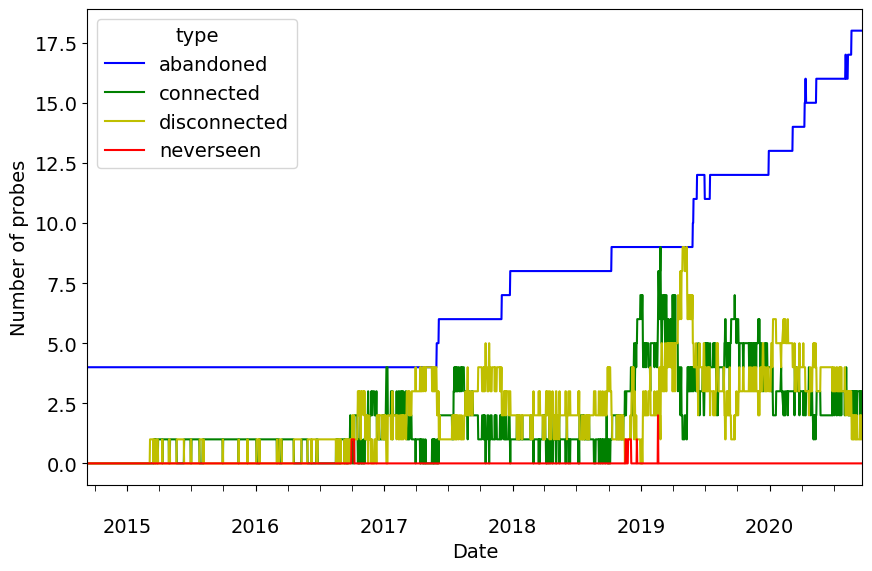

In [34]:
# plot data
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df_agg2.date = pd.to_datetime(df_agg2['date'], format='%Y-%m-%d')

styles = ['b','g','y', 'r']

df_agg2.groupby(['date','type']).sum()['amount'].unstack()

df_agg2.groupby(['date','type']).sum()['amount'].unstack().plot(style=styles, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of probes')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
#ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.tick_params(axis="x", which="both", length=4)

plt.tick_params(labelsize=14)
#plt.savefig("data/plots/probes_deployment_timeseries.pdf", bbox_inches="tight")
plt.show()



In [41]:
print(df_agg2.date)

0       2014-09-10
1       2014-09-11
2       2014-09-12
3       2014-09-13
4       2014-09-14
5       2014-09-15
6       2014-09-16
7       2014-09-17
8       2014-09-18
9       2014-09-19
10      2014-09-20
11      2014-09-21
12      2014-09-22
13      2014-09-23
14      2014-09-24
15      2014-09-25
16      2014-09-26
17      2014-09-27
18      2014-09-28
19      2014-09-29
20      2014-09-30
21      2014-10-01
22      2014-10-02
23      2014-10-03
24      2014-10-04
25      2014-10-05
26      2014-10-06
27      2014-10-07
28      2014-10-08
29      2014-10-09
           ...    
2158          2158
2159          2159
2160          2160
2161          2161
2162          2162
2163          2163
2164          2164
2165          2165
2166          2166
2167          2167
2168          2168
2169          2169
2170          2170
2171          2171
2172          2172
2173          2173
2174          2174
2175          2175
2176          2176
2177          2177
2178          2178
2179        